In [182]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon-qualification/Starter Notebook.ipynb
/kaggle/input/hackathon-qualification/archive/sample_submission.csv
/kaggle/input/hackathon-qualification/archive/train.csv
/kaggle/input/hackathon-qualification/archive/test.csv


**Introduction and Problem Statement**

In [144]:
# DSN Used Car Price Prediction Challenge

##  **Objective**
Predict the price of used cars based on various attributes like brand, model, year, mileage, etc.


##  **Evaluation Metric**
- **Root Mean Squared Error (RMSE)** - Lower is better
- RMSE measures the average difference between predicted and actual prices


##  **Submission Format**
The submission file should contain:
- `id`: Car identifier from test set
- `price`: Predicted price for each car

Example format:
id,price
188533,43878.016
188534,43878.016
188535,43878.016

##  **Learning Goals**
1. Exploratory Data Analysis (EDA)
2. Feature Engineering for car price prediction
3. Model comparison and selection
4. Creating competition-ready submissions

**Import Libraries**

In [180]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

In [181]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [183]:
# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [184]:
# Utilities
import re
import warnings
warnings.filterwarnings('ignore')

In [185]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [186]:
print(" All libraries imported successfully!")
print(" Ready to start car price prediction challenge!")

 All libraries imported successfully!
 Ready to start car price prediction challenge!


In [187]:
# Load the datasets
print(" Loading datasets...")
train_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/train.csv')
test_df = pd.read_csv('/kaggle/input/hackathon-qualification/archive/test.csv')
sample_submission = pd.read_csv('/kaggle/input/hackathon-qualification/archive/sample_submission.csv')

 Loading datasets...


In [188]:
# Basic information about datasets
print("=" * 50)
print(" DATASET OVERVIEW")
print("=" * 50)
print(f" Training data shape: {train_df.shape}")
print(f" Test data shape: {test_df.shape}")
print(f" Sample submission shape: {sample_submission.shape}")

 DATASET OVERVIEW
 Training data shape: (188533, 13)
 Test data shape: (125690, 12)
 Sample submission shape: (125690, 2)


In [153]:
print("\n" + "=" * 50)
print(" COLUMN INFORMATION")
print("=" * 50)
print("Training columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


 COLUMN INFORMATION
Training columns: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Test columns: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [189]:
print("\n" + "=" * 50)
print(" DATA TYPES")
print("=" * 50)
print(train_df.dtypes)


 DATA TYPES
id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object


In [190]:
print("\n" + "=" * 50)
print(" FIRST 5 ROWS")
print("=" * 50)
display(train_df.head())


 FIRST 5 ROWS


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [191]:
print("\n" + "=" * 50)
print(" SAMPLE SUBMISSION FORMAT")
print("=" * 50)
display(sample_submission.head())


 SAMPLE SUBMISSION FORMAT


,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


**Basic Data Statistics**

In [192]:
# Statistical summary of numerical columns
print("=" * 60)
print(" STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)
display(train_df.describe())

 STATISTICAL SUMMARY - NUMERICAL COLUMNS


,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [193]:
# Information about categorical columns
print("\n" + "=" * 60)
print(" CATEGORICAL COLUMNS SUMMARY")
print("=" * 60)

categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'id':  # Skip id column
        print(f"\n {col.upper()}:")
        print(f"   Unique values: {train_df[col].nunique()}")
        print(f"   Most common: {train_df[col].value_counts().head(3).to_dict()}")


 CATEGORICAL COLUMNS SUMMARY

 BRAND:
   Unique values: 57
   Most common: {'Ford': 23088, 'Mercedes-Benz': 19172, 'BMW': 17028}

 MODEL:
   Unique values: 1897
   Most common: {'F-150 XLT': 2945, 'M3 Base': 2229, 'Camaro 2SS': 1709}

 FUEL_TYPE:
   Unique values: 7
   Most common: {'Gasoline': 165940, 'Hybrid': 6832, 'E85 Flex Fuel': 5406}

 ENGINE:
   Unique values: 1117
   Most common: {'355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel': 3462, '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel': 2902, '420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel': 2841}

 TRANSMISSION:
   Unique values: 52
   Most common: {'A/T': 49904, '8-Speed A/T': 20645, 'Transmission w/Dual Shift Mode': 19255}

 EXT_COL:
   Unique values: 319
   Most common: {'Black': 48658, 'White': 43815, 'Gray': 25293}

 INT_COL:
   Unique values: 156
   Most common: {'Black': 107674, 'Beige': 24495, 'Gray': 21204}

 ACCIDENT:
   Unique values: 2
   Most common: {'None reported': 144514, 'At least 1 accident or damage reported': 41

In [194]:
print("\n" + "=" * 60)
print(" MISSING VALUES ANALYSIS")
print("=" * 60)
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Percentage', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])


 MISSING VALUES ANALYSIS
         Column  Missing Count  Missing Percentage
11  clean_title          21419           11.360876
5     fuel_type           5083            2.696080
10     accident           2452            1.300568


**Target Variable Analysis**

In [160]:
# Analyze the target variable (price)
print("=" * 60)
print("TARGET VARIABLE ANALYSIS - CAR PRICES")
print("=" * 60)

TARGET VARIABLE ANALYSIS - CAR PRICES


In [195]:
# Basic statistics
price_stats = train_df['price'].describe()
print(" Price Statistics:")
for stat, value in price_stats.items():
    print(f"   {stat.title()}: ${value:,.2f}")

 Price Statistics:
   Count: $188,533.00
   Mean: $43,878.02
   Std: $78,819.52
   Min: $2,000.00
   25%: $17,000.00
   50%: $30,825.00
   75%: $49,900.00
   Max: $2,954,083.00


Text(0.5, 0.98, '🎯 Car Price Distribution Analysis')

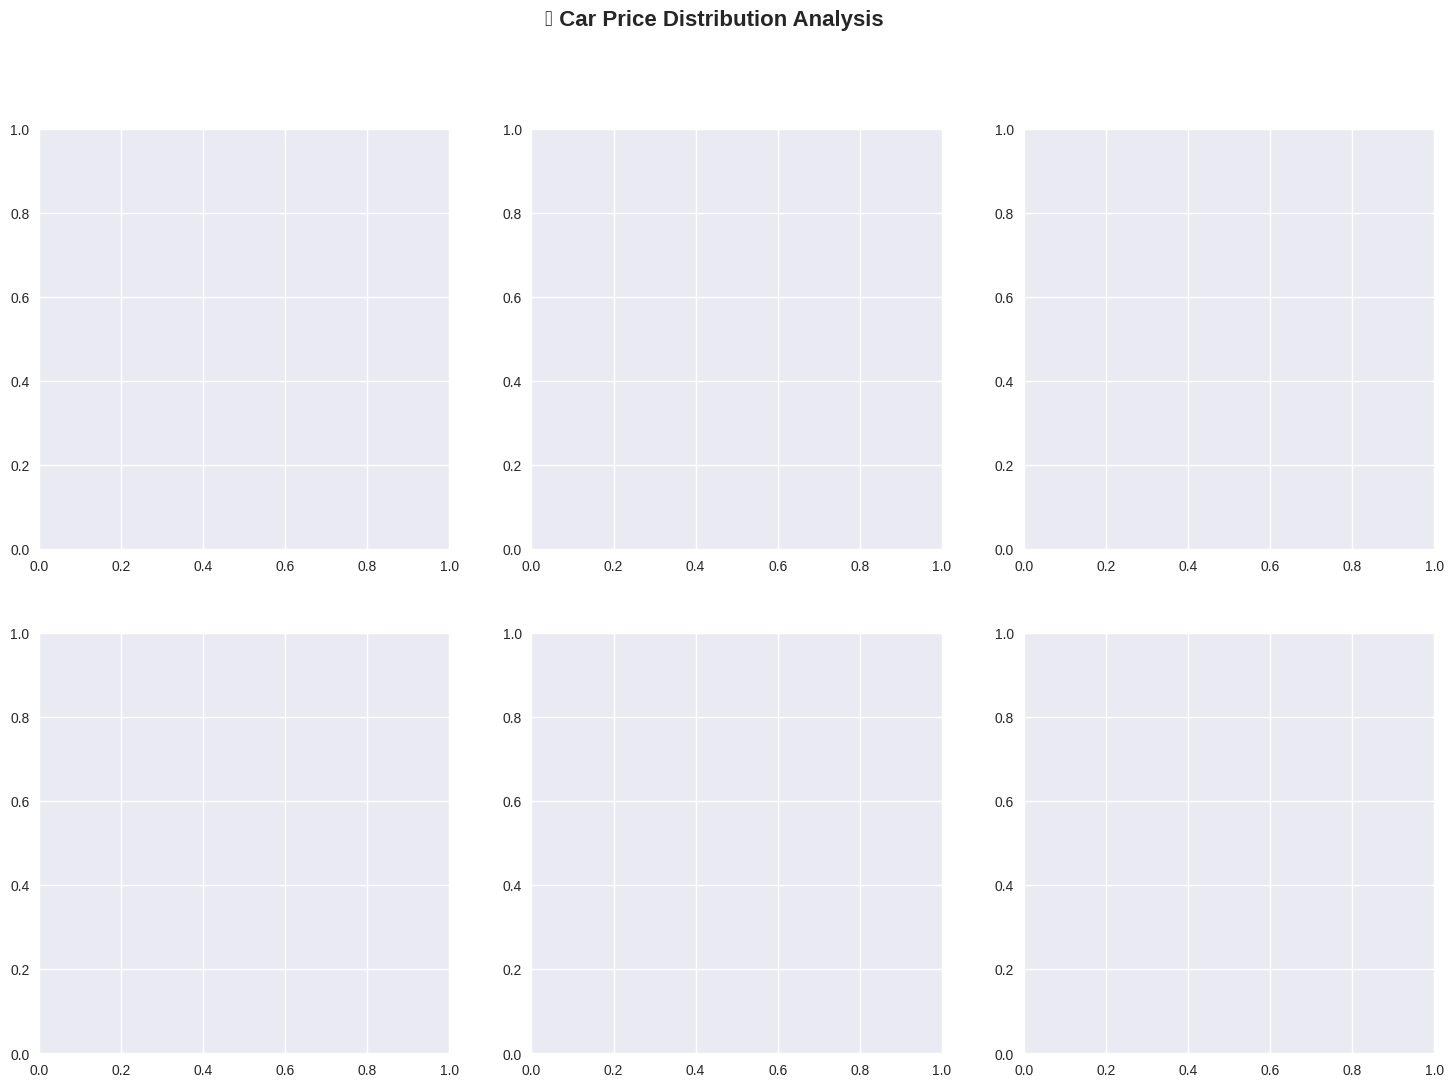

In [196]:
# Create comprehensive price visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Car Price Distribution Analysis', fontsize=16, fontweight='bold')

In [197]:
# 1. Histogram
axes[0,0].hist(train_df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(train_df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${train_df["price"].mean():,.0f}')
axes[0,0].legend()

In [198]:
# 2. Log-transformed histogram
axes[0,1].hist(np.log(train_df['price']), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Log Price Distribution')
axes[0,1].set_xlabel('Log Price')
axes[0,1].set_ylabel('Frequency')

Text(496.7973856209152, 0.5, 'Frequency')

In [199]:
# 3. Box plot
axes[0,2].boxplot(train_df['price'])
axes[0,2].set_title('Price Box Plot')
axes[0,2].set_ylabel('Price ($)')

Text(989.1503267973857, 0.5, 'Price ($)')

In [200]:
# 4. Price by car age - SIMPLE VERSION
try:
    train_df['car_age'] = 2025 - train_df['model_year']
    age_price = train_df.groupby('car_age')['price'].mean().reset_index()
    axes[1,0].plot(age_price['car_age'], age_price['price'], marker='o', color='orange')
    axes[1,0].set_title('Average Price by Car Age')
    axes[1,0].set_xlabel('Car Age (Years)')
    axes[1,0].set_ylabel('Average Price ($)')
except KeyError as e:
    print(f"Error: Column not found - {e}")
    print("Available columns:", train_df.columns.tolist())
    axes[1,0].text(0.5, 0.5, 'Error loading\ncar age data', 
                   horizontalalignment='center', verticalalignment='center',
                   transform=axes[1,0].transAxes)

In [201]:
# 5. Price by mileage (scatter plot sample)
sample_data = train_df.sample(5000, random_state=42)
axes[1,1].scatter(sample_data['milage'], sample_data['price'], alpha=0.5, color='purple')
axes[1,1].set_title('Price vs Mileage (5K Sample)')
axes[1,1].set_xlabel('Mileage')
axes[1,1].set_ylabel('Price ($)')

Text(496.7973856209152, 0.5, 'Price ($)')

In [202]:
# Price outliers analysis
Q1 = train_df['price'].quantile(0.25)
Q3 = train_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [203]:
outliers = train_df[(train_df['price'] < lower_bound) | (train_df['price'] > upper_bound)]
print(f"\n Price Outliers Analysis:")
print(f"   Lower bound: ${lower_bound:,.2f}")
print(f"   Upper bound: ${upper_bound:,.2f}")
print(f"   Number of outliers: {len(outliers):,} ({len(outliers)/len(train_df)*100:.1f}%)")


 Price Outliers Analysis:
   Lower bound: $-32,350.00
   Upper bound: $99,250.00
   Number of outliers: 10,880 (5.8%)


**Detailed Exploratory Data Analysis (EDA)**

In [204]:
# Comprehensive EDA with multiple visualizations
print("=" * 60)
print(" COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
print("=" * 60)

 COMPREHENSIVE EXPLORATORY DATA ANALYSIS


In [205]:
# 1. Brand Analysis
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Text(0.5, 0, 'Number of Cars')

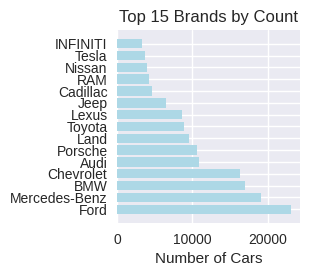

In [206]:
# Top brands by count
plt.subplot(2, 3, 1)
top_brands = train_df['brand'].value_counts().head(15)
plt.barh(range(len(top_brands)), top_brands.values, color='lightblue')
plt.yticks(range(len(top_brands)), top_brands.index)
plt.title('Top 15 Brands by Count')
plt.xlabel('Number of Cars')

Text(0.5, 0, 'Average Price ($)')

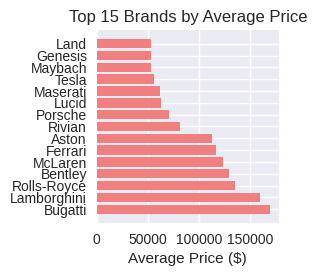

In [207]:
# Brand vs average price
plt.subplot(2, 3, 2)
brand_avg_price = train_df.groupby('brand')['price'].mean().sort_values(ascending=False).head(15)
plt.barh(range(len(brand_avg_price)), brand_avg_price.values, color='lightcoral')
plt.yticks(range(len(brand_avg_price)), brand_avg_price.index)
plt.title('Top 15 Brands by Average Price')
plt.xlabel('Average Price ($)')

Text(0, 0.5, 'Count')

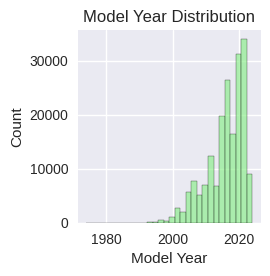

In [208]:
# Model year distribution
plt.subplot(2, 3, 3)
plt.hist(train_df['model_year'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Count')

(0.0, 161800.0)

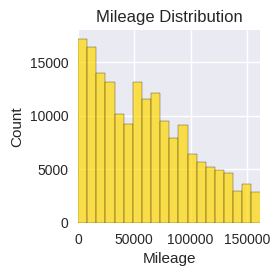

In [209]:
# Mileage distribution
plt.subplot(2, 3, 4)
plt.hist(train_df['milage'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.xlim(0, train_df['milage'].quantile(0.95))  # Remove extreme outliers for better view

Text(0.5, 1.0, 'Fuel Type Distribution')

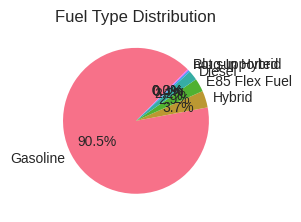

In [211]:
# Fuel type distribution
plt.subplot(2, 3, 5)
fuel_counts = train_df['fuel_type'].value_counts()
plt.pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Fuel Type Distribution')

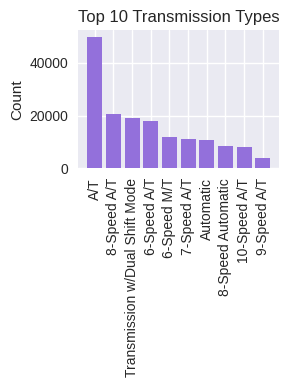

In [213]:
# Transmission type distribution
plt.subplot(2, 3, 6)
trans_counts = train_df['transmission'].value_counts().head(10)
plt.bar(range(len(trans_counts)), trans_counts.values, color='mediumpurple')
plt.xticks(range(len(trans_counts)), trans_counts.index, rotation=90)
plt.title('Top 10 Transmission Types')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [214]:
# Correlation analysis for numerical features
numerical_features = ['model_year', 'milage', 'price', 'car_age']
correlation_matrix = train_df[numerical_features].corr()

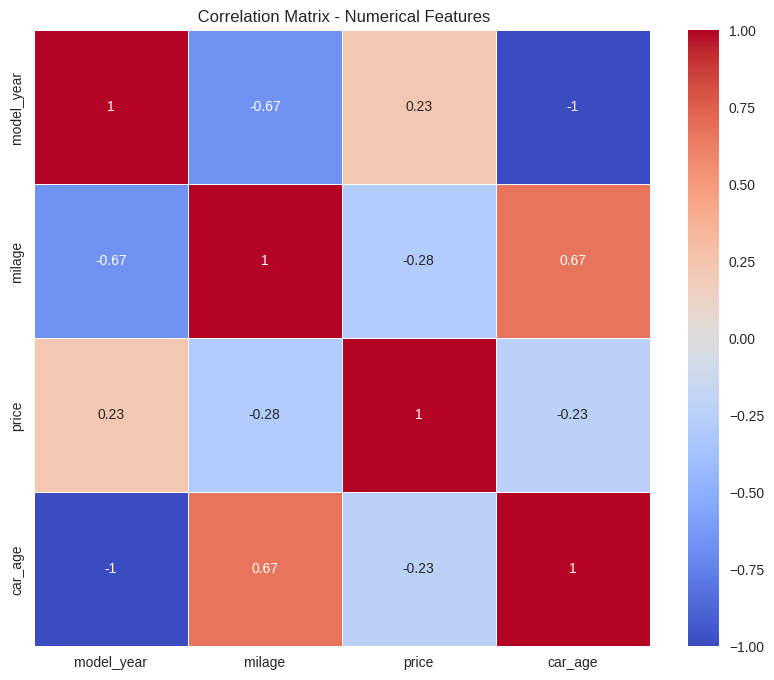

In [215]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title(' Correlation Matrix - Numerical Features')
plt.show()

In [216]:
print(" Key Correlations with Price:")
price_correlations = correlation_matrix['price'].sort_values(key=abs, ascending=False)
for feature, corr in price_correlations.items():
    if feature != 'price':
        direction = " Positive" if corr > 0 else " Negative"
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"   {feature}: {corr:.3f} ({direction}, {strength})")

 Key Correlations with Price:
   milage: -0.283 ( Negative, Weak)
   car_age: -0.232 ( Negative, Weak)
   model_year: 0.232 ( Positive, Weak)


Advanced Feature Engineering

In [218]:
print("=" * 60)
print("⚙️ ADVANCED FEATURE ENGINEERING")
print("=" * 60)

# Define feature engineering functions
def extract_engine_hp(engine_str):
    """Extract horsepower from engine description"""
    if pd.isna(engine_str):
        return np.nan
    # Look for pattern like "172.0HP"
    match = re.search(r'(\d+\.?\d*)HP', str(engine_str))
    if match:
        return float(match.group(1))
    return np.nan

def extract_engine_size(engine_str):
    """Extract engine size (liters) from engine description"""
    if pd.isna(engine_str):
        return np.nan
    # Look for pattern like "1.6L"
    match = re.search(r'(\d+\.?\d*)L', str(engine_str))
    if match:
        return float(match.group(1))
    return np.nan

def extract_cylinder_count(engine_str):
    """Extract number of cylinders from engine description"""
    if pd.isna(engine_str):
        return np.nan
    # Look for pattern like "4 Cylinder"
    match = re.search(r'(\d+)\s+Cylinder', str(engine_str))
    if match:
        return int(match.group(1))
    return np.nan

def engineer_features(df, is_train=True):
    """
    Comprehensive feature engineering for car price prediction
    
    Args:
        df: Input dataframe
        is_train: Boolean indicating if this is training data
    
    Returns:
        Processed dataframe with new features
    """
    df = df.copy()
    
    print(f" Processing {'training' if is_train else 'test'} data...")
    
    # 1.  Time-based features
    print("    Creating time-based features...")
    df['car_age'] = 2025 - df['model_year']
    df['is_new_car'] = (df['car_age'] <= 2).astype(int)
    df['is_vintage'] = (df['car_age'] >= 20).astype(int)
    
    # 2.  Engine features
    print("    Extracting engine features...")
    df['engine_hp'] = df['engine'].apply(extract_engine_hp)
    df['engine_size_l'] = df['engine'].apply(extract_engine_size)
    df['cylinder_count'] = df['engine'].apply(extract_cylinder_count)
    df['hp_per_liter'] = df['engine_hp'] / (df['engine_size_l'] + 0.1)  # Power density
    
    # 3.  Mileage features
    print("    Creating mileage features...")
    df['mileage_log'] = np.log(df['milage'] + 1)
    df['mileage_per_year'] = df['milage'] / (df['car_age'] + 1)
    df['low_mileage'] = (df['milage'] < 50000).astype(int)
    df['high_mileage'] = (df['milage'] > 150000).astype(int)
    
    # 4.  Brand categories
    print("    Creating brand categories...")
    luxury_brands = [
        'Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Acura', 'Infiniti', 
        'Cadillac', 'Lincoln', 'Jaguar', 'Land Rover', 'Porsche', 
        'Maserati', 'Bentley', 'Tesla', 'Genesis', 'Volvo'
    ]
    
    economy_brands = [
        'Hyundai', 'Kia', 'Nissan', 'Mitsubishi', 'Suzuki'
    ]
    
    american_brands = [
        'Ford', 'Chevrolet', 'Dodge', 'Chrysler', 'Cadillac', 'Lincoln',
        'Buick', 'GMC', 'Jeep', 'Ram'
    ]
    
    df['is_luxury'] = df['brand'].isin(luxury_brands).astype(int)
    df['is_economy'] = df['brand'].isin(economy_brands).astype(int)
    df['is_american'] = df['brand'].isin(american_brands).astype(int)
    
    # 5.  Vehicle condition features
    print("    Creating condition features...")
    df['has_accident'] = (df['accident'] != 'None reported').astype(int)
    df['clean_title_binary'] = (df['clean_title'] == 'Yes').astype(int)
    
    # 6.  Fuel and transmission features
    print("    Creating fuel and transmission features...")
    df['is_gasoline'] = (df['fuel_type'] == 'Gasoline').astype(int)
    df['is_hybrid'] = df['fuel_type'].str.contains('Hybrid', na=False).astype(int)
    df['is_electric'] = (df['fuel_type'] == 'Electric').astype(int)
    df['is_diesel'] = df['fuel_type'].str.contains('Diesel', na=False).astype(int)
    
    df['is_automatic'] = df['transmission'].str.contains('A/T', na=False).astype(int)
    df['is_manual'] = df['transmission'].str.contains('M/T', na=False).astype(int)
    df['is_cvt'] = df['transmission'].str.contains('CVT', na=False).astype(int)
    
    # 7.  Color features
    print("    Creating color features...")
    popular_ext_colors = ['Black', 'White', 'Silver', 'Gray', 'Blue']
    popular_int_colors = ['Black', 'Gray', 'Beige', 'Brown']
    
    df['popular_ext_color'] = df['ext_col'].isin(popular_ext_colors).astype(int)
    df['popular_int_color'] = df['int_col'].isin(popular_int_colors).astype(int)
    
    # 8.  Interaction features
    print("    Creating interaction features...")
    df['luxury_low_mileage'] = df['is_luxury'] * df['low_mileage']
    df['age_mileage_interaction'] = df['car_age'] * np.log(df['milage'] + 1)
    
    return df

# Apply feature engineering
print(" Starting feature engineering process...")
train_processed = engineer_features(train_df, is_train=True)
test_processed = engineer_features(test_df, is_train=False)

print("\n New features created successfully!")
print(f"Original columns: {train_df.shape[1]}")
print(f"After feature engineering: {train_processed.shape[1]}")
print(f"New features added: {train_processed.shape[1] - train_df.shape[1]}")

# Display some of the new features
new_features = [col for col in train_processed.columns if col not in train_df.columns]
print(f"\n New features: {new_features}")

⚙️ ADVANCED FEATURE ENGINEERING
 Starting feature engineering process...
 Processing training data...
    Creating time-based features...
    Extracting engine features...
    Creating mileage features...
    Creating brand categories...
    Creating condition features...
    Creating fuel and transmission features...
    Creating color features...
    Creating interaction features...
 Processing test data...
    Creating time-based features...
    Extracting engine features...
    Creating mileage features...
    Creating brand categories...
    Creating condition features...
    Creating fuel and transmission features...
    Creating color features...
    Creating interaction features...

 New features created successfully!
Original columns: 14
After feature engineering: 40
New features added: 26

 New features: ['is_new_car', 'is_vintage', 'engine_hp', 'engine_size_l', 'cylinder_count', 'hp_per_liter', 'mileage_log', 'mileage_per_year', 'low_mileage', 'high_mileage', 'is_luxury', 'i

**Data Preprocessing and Missing Value Handling**

In [ ]:
print("=" * 60)
print(" DATA PREPROCESSING AND MISSING VALUE HANDLING")
print("=" * 60)

def handle_missing_values(df):
    """Comprehensive missing value handling"""
    df = df.copy()
    
    print(" Analyzing missing values...")
    missing_before = df.isnull().sum().sum()
    
    # Handle engine features
    print("   🔧 Filling missing engine features...")
    df['engine_hp'].fillna(df['engine_hp'].median(), inplace=True)
    df['engine_size_l'].fillna(df['engine_size_l'].median(), inplace=True)
    df['cylinder_count'].fillna(df['cylinder_count'].median(), inplace=True)
    df['hp_per_liter'].fillna(df['hp_per_liter'].median(), inplace=True)
    
    # Handle fuel type
    print("    Filling missing fuel type...")
    df['fuel_type'].fillna('Gasoline', inplace=True)
    
    # Handle accident and title information
    print("    Filling missing accident/title info...")
    df['accident'].fillna('None reported', inplace=True)
    df['clean_title'].fillna('Yes', inplace=True)
    df['has_accident'].fillna(0, inplace=True)
    df['clean_title_binary'].fillna(1, inplace=True)
    
    missing_after = df.isnull().sum().sum()
    print(f" Missing values: {missing_before} → {missing_after}")
    
    return df

# Handle missing values
print(" Cleaning training data...")
train_processed = handle_missing_values(train_processed)

print(" Cleaning test data...")
test_processed = handle_missing_values(test_processed)

# Encode categorical variables
print("\n ENCODING CATEGORICAL VARIABLES")
print("=" * 40)

categorical_columns = ['brand', 'model', 'fuel_type', 'transmission', 
                      'ext_col', 'int_col', 'accident', 'clean_title']

label_encoders = {}

for col in categorical_columns:
    print(f"   Encoding {col}...")
    le = LabelEncoder()
    
    # Combine both datasets for consistent encoding
    combined_values = pd.concat([
        train_processed[col], 
        test_processed[col]
    ], axis=0).astype(str)
    
    le.fit(combined_values)
    
    train_processed[col] = le.transform(train_processed[col].astype(str))
    test_processed[col] = le.transform(test_processed[col].astype(str))
    label_encoders[col] = le

print(" All categorical variables encoded!")

# Verify data quality
print("\n DATA QUALITY CHECK")
print("=" * 30)
print(f"Training data shape: {train_processed.shape}")
print(f"Test data shape: {test_processed.shape}")
print(f"Missing values in train: {train_processed.isnull().sum().sum()}")
print(f"Missing values in test: {test_processed.isnull().sum().sum()}")

**Feature Selection and Preparation**

In [219]:
print("=" * 60)
print(" FEATURE SELECTION AND MODEL PREPARATION")
print("=" * 60)

 FEATURE SELECTION AND MODEL PREPARATION


In [220]:
# Define features for modeling
feature_columns = [
    # Original features
    'brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
    'ext_col', 'int_col', 'accident', 'clean_title',
    
    # Engineered features
    'car_age', 'is_new_car', 'is_vintage',
    'engine_hp', 'engine_size_l', 'cylinder_count', 'hp_per_liter',
    'mileage_log', 'mileage_per_year', 'low_mileage', 'high_mileage',
    'is_luxury', 'is_economy', 'is_american',
    'has_accident', 'clean_title_binary',
    'is_gasoline', 'is_hybrid', 'is_electric', 'is_diesel',
    'is_automatic', 'is_manual', 'is_cvt',
    'popular_ext_color', 'popular_int_color',
    'luxury_low_mileage', 'age_mileage_interaction'
]

In [221]:
# Prepare features and target
X = train_processed[feature_columns].copy()
y = train_processed['price'].copy()
X_test = test_processed[feature_columns].copy()

In [222]:
print(f" Feature matrix shape: {X.shape}")
print(f" Target vector shape: {y.shape}")
print(f" Test matrix shape: {X_test.shape}")

 Feature matrix shape: (188533, 37)
 Target vector shape: (188533,)
 Test matrix shape: (125690, 37)


In [223]:
# Feature statistics
print(f"\n FEATURE OVERVIEW")
print("=" * 30)
print(f"Total features: {len(feature_columns)}")
print(f"Original features: {len(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'])}")
print(f"Engineered features: {len(feature_columns) - 10}")


 FEATURE OVERVIEW
Total features: 37
Original features: 10
Engineered features: 27


In [224]:
# Check for any remaining issues
print(f"\n DATA VALIDATION")
print("=" * 25)
print(f"X matrix - Missing values: {X.isnull().sum().sum()}")
print(f"X matrix - Infinite values: {np.isinf(X.select_dtypes(include=[np.number])).sum().sum()}")
print(f"y vector - Missing values: {y.isnull().sum()}")
print(f"X_test matrix - Missing values: {X_test.isnull().sum().sum()}")


 DATA VALIDATION
X matrix - Missing values: 152168
X matrix - Infinite values: 0
y vector - Missing values: 0
X_test matrix - Missing values: 101177


In [225]:
# Replace any remaining infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [228]:
# Fill any remaining NaN values - CORRECTED VERSION
print("🔧 Handling remaining NaN values...")

# Separate numeric and non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

print(f"Numeric columns: {len(numeric_columns)}")
print(f"Non-numeric columns: {len(non_numeric_columns)}")

if len(non_numeric_columns) > 0:
    print(" Warning: Found non-numeric columns:", non_numeric_columns.tolist())
    
    # Fill numeric columns with median
    X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())
    X_test[numeric_columns] = X_test[numeric_columns].fillna(X_test[numeric_columns].median())
    
    # Fill non-numeric columns with mode (most frequent value)
    for col in non_numeric_columns:
        X[col] = X[col].fillna(X[col].mode()[0] if len(X[col].mode()) > 0 else 'Unknown')
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0] if len(X_test[col].mode()) > 0 else 'Unknown')
        
    print(" Filled numeric columns with median, non-numeric with mode")
else:
    # All columns are numeric, safe to use median
    X = X.fillna(X.median())
    X_test = X_test.fillna(X_test.median())
    print(" All columns numeric - filled with median")

# Verify no missing values remain
print(f"Remaining NaN in X: {X.isnull().sum().sum()}")
print(f"Remaining NaN in X_test: {X_test.isnull().sum().sum()}")

🔧 Handling remaining NaN values...
Numeric columns: 29
Non-numeric columns: 8
 Filled numeric columns with median, non-numeric with mode
Remaining NaN in X: 0
Remaining NaN in X_test: 0


In [229]:
print(" Data preparation complete and validated!")

 Data preparation complete and validated!


**Model Training and Comparison**

In [230]:
print("=" * 60)
print(" MODEL TRAINING AND COMPARISON")
print("=" * 60)

 MODEL TRAINING AND COMPARISON


In [231]:
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f" Training set: {X_train.shape[0]:,} samples")
print(f" Validation set: {X_val.shape[0]:,} samples")

 Training set: 150,826 samples
 Validation set: 37,707 samples


In [232]:
# Initialize models and results storage
models = {}
predictions = {}
rmse_scores = {}
mae_scores = {}
r2_scores = {}

def evaluate_model(model, name, X_train, X_val, y_train, y_val):
    """Train and evaluate a model"""
    print(f"\n Training {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Store results
    models[name] = model
    predictions[name] = y_pred
    rmse_scores[name] = rmse
    mae_scores[name] = mae
    r2_scores[name] = r2
    
    print(f"    RMSE: ${rmse:,.2f}")
    print(f"    MAE:  ${mae:,.2f}")
    print(f"    R²:   {r2:.4f}")
    
    return model

In [234]:
# 1. Linear Regression (Baseline)
print(" Training models...")
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessor: OneHotEncode categoricals, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create pipeline with preprocessing + model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

# Fit and evaluate
evaluate_model(lr_pipeline, 'Linear Regression', X_train, X_val, y_train, y_val)


 Training models...

 Training Linear Regression...
    RMSE: $69,574.18
    MAE:  $22,036.86
    R²:   0.1296


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['model_year', 'milage', 'car_age', 'is_new_car', 'is_vintage',
       'engine_hp', 'engine_size_l', 'cylinder_count', 'hp_per_liter',
       'mileage_log', 'mileage_per_year', 'low_mileage', 'high_mileage',
       'is_luxury', 'is_economy', 'is_american', 'has_accident',
       'clean_title_binary', 'is...ric',
       'is_diesel', 'is_automatic', 'is_manual', 'is_cvt', 'popular_ext_color',
       'popular_int_color', 'luxury_low_mileage', 'age_mileage_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [236]:
# 2. Random Forest
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessor: OneHotEncode categoricals, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(
                                  n_estimators=100,
                                  max_depth=15,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_features='sqrt',
                                  random_state=42,
                                  n_jobs=-1
                              ))])

# Fit and evaluate
evaluate_model(rf_pipeline, 'Random Forest', X_train, X_val, y_train, y_val)



 Training Random Forest...
    RMSE: $68,931.02
    MAE:  $20,613.41
    R²:   0.1456


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['model_year', 'milage', 'car_age', 'is_new_car', 'is_vintage',
       'engine_hp', 'engine_size_l', 'cylinder_count', 'hp_per_liter',
       'mileage_log', 'mileage_per_year', 'low_mileage', 'high_mileage',
       'is_luxury', 'is_economy', 'is_american', 'has_accident',
       'clean_title_binary', 'is...
       'popular_int_color', 'luxury_low_mileage', 'age_mileage_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=5,
                                       n_jobs=-1, random_state=42))])

In [238]:
# 3. Gradient Boosting
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessor: OneHotEncode categoricals, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingRegressor(
                                  n_estimators=100,
                                  learning_rate=0.1,
                                  max_depth=8,
                                  min_samples_split=5,
                                  min_samples_leaf=3,
                                  subsample=0.8,
                                  random_state=42
                              ))])

# Fit and evaluate
evaluate_model(gb_pipeline, 'Gradient Boosting', X_train, X_val, y_train, y_val)



 Training Gradient Boosting...
    RMSE: $69,855.27
    MAE:  $20,027.66
    R²:   0.1225


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['model_year', 'milage', 'car_age', 'is_new_car', 'is_vintage',
       'engine_hp', 'engine_size_l', 'cylinder_count', 'hp_per_liter',
       'mileage_log', 'mileage_per_year', 'low_mileage', 'high_mileage',
       'is_luxury', 'is_economy', 'is_american', 'has_accident',
       'clean_title_binary', 'is...
       'popular_int_color', 'luxury_low_mileage', 'age_mileage_interaction'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title'],
      dtype='object'))])),
                ('model',
                 GradientBoostingRegressor(max_depth=8, min_samples_leaf=3,
                                           min_samples_split=5, random_state=42,
                                           subsample=0.8))])

In [239]:
# Select best model
best_model_name = min(rmse_scores, key=rmse_scores.get)
best_model = models[best_model_name]
best_rmse = rmse_scores[best_model_name]

In [240]:
print(f"\n MODEL COMPARISON RESULTS")
print("=" * 40)
for name in models.keys():
    indicator = "🥇" if name == best_model_name else "  "
    print(f"{indicator} {name:15} | RMSE: ${rmse_scores[name]:>8,.0f} | MAE: ${mae_scores[name]:>8,.0f} | R²: {r2_scores[name]:>6.3f}")

print(f"\n BEST MODEL: {best_model_name}")
print(f" BEST RMSE: ${best_rmse:,.2f}")


 MODEL COMPARISON RESULTS
   Linear Regression | RMSE: $  69,574 | MAE: $  22,037 | R²:  0.130
🥇 Random Forest   | RMSE: $  68,931 | MAE: $  20,613 | R²:  0.146
   Gradient Boosting | RMSE: $  69,855 | MAE: $  20,028 | R²:  0.123

 BEST MODEL: Random Forest
 BEST RMSE: $68,931.02


**Feature Importance Analysis**

In [241]:
##  **CELL 11: Feature Importance Analysis**

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print("=" * 60)
    print(" FEATURE IMPORTANCE ANALYSIS")
    print("=" * 60)

 FEATURE IMPORTANCE ANALYSIS


In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Get feature importances ---
if hasattr(best_model, "named_steps"):
    preprocessor = best_model.named_steps['preprocessor']
    final_model = best_model.named_steps['model']

    # Get transformed feature names
    encoded_features = []
    for name, trans, cols in preprocessor.transformers_:
        if name == 'num':
            encoded_features.extend(cols)
        elif name == 'cat':
            encoder = trans
            encoded_features.extend(encoder.get_feature_names_out(cols))
else:
    final_model = best_model
    encoded_features = feature_columns

# Build importance dataframe
if hasattr(final_model, "feature_importances_"):
    feature_importance = pd.DataFrame({
        'feature': encoded_features,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)
else:
    raise ValueError(f"{best_model_name} does not support feature importances.")


In [246]:
    # Visualize feature importance
    plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, 'Importance Score')

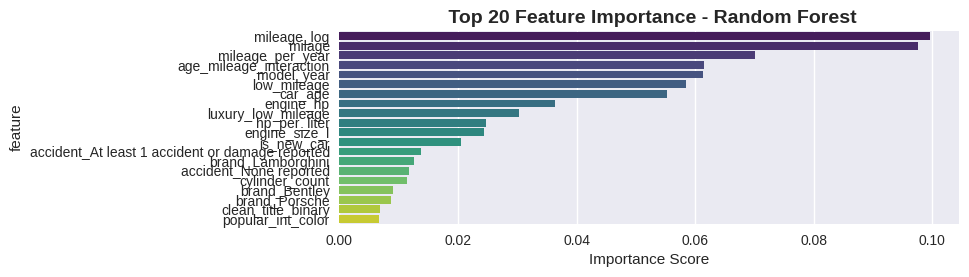

In [249]:
    # Top 20 features
    top_features = feature_importance.head(20)
    
    plt.subplot(2, 1, 1)
    sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
    plt.title(f' Top 20 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')

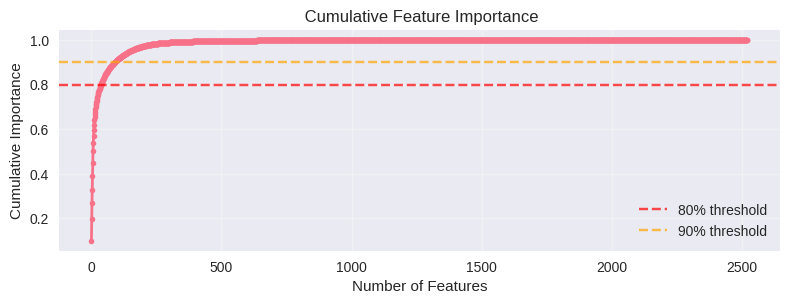

In [250]:
    # Cumulative importance
    plt.subplot(2, 1, 2)
    cumulative_importance = feature_importance['importance'].cumsum()
    plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 
             marker='o', linewidth=2, markersize=4)
    plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% threshold')
    plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
    plt.title(' Cumulative Feature Importance')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [251]:
    # Feature importance insights
    print(f"\n FEATURE INSIGHTS")
    print("=" * 30)


 FEATURE INSIGHTS


In [252]:
    # Top 5 features analysis
    top_5 = feature_importance.head(5)
    total_top5_importance = top_5['importance'].sum()
    print(f" Top 5 features account for {total_top5_importance:.1%} of model importance")

 Top 5 features account for 39.0% of model importance


In [253]:
    # Feature categories
    original_features = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
    engineered_features = [f for f in feature_columns if f not in original_features]
    
    original_importance = feature_importance[feature_importance['feature'].isin(original_features)]['importance'].sum()
    engineered_importance = feature_importance[feature_importance['feature'].isin(engineered_features)]['importance'].sum()
    
    print(f" Original features importance: {original_importance:.1%}")
    print(f"⚙️ Engineered features importance: {engineered_importance:.1%}")
    


 Original features importance: 15.9%
⚙️ Engineered features importance: 54.2%


**Model Performance Visualization**

In [254]:
print("=" * 60)
print(" MODEL PERFORMANCE VISUALIZATION")
print("=" * 60)

 MODEL PERFORMANCE VISUALIZATION


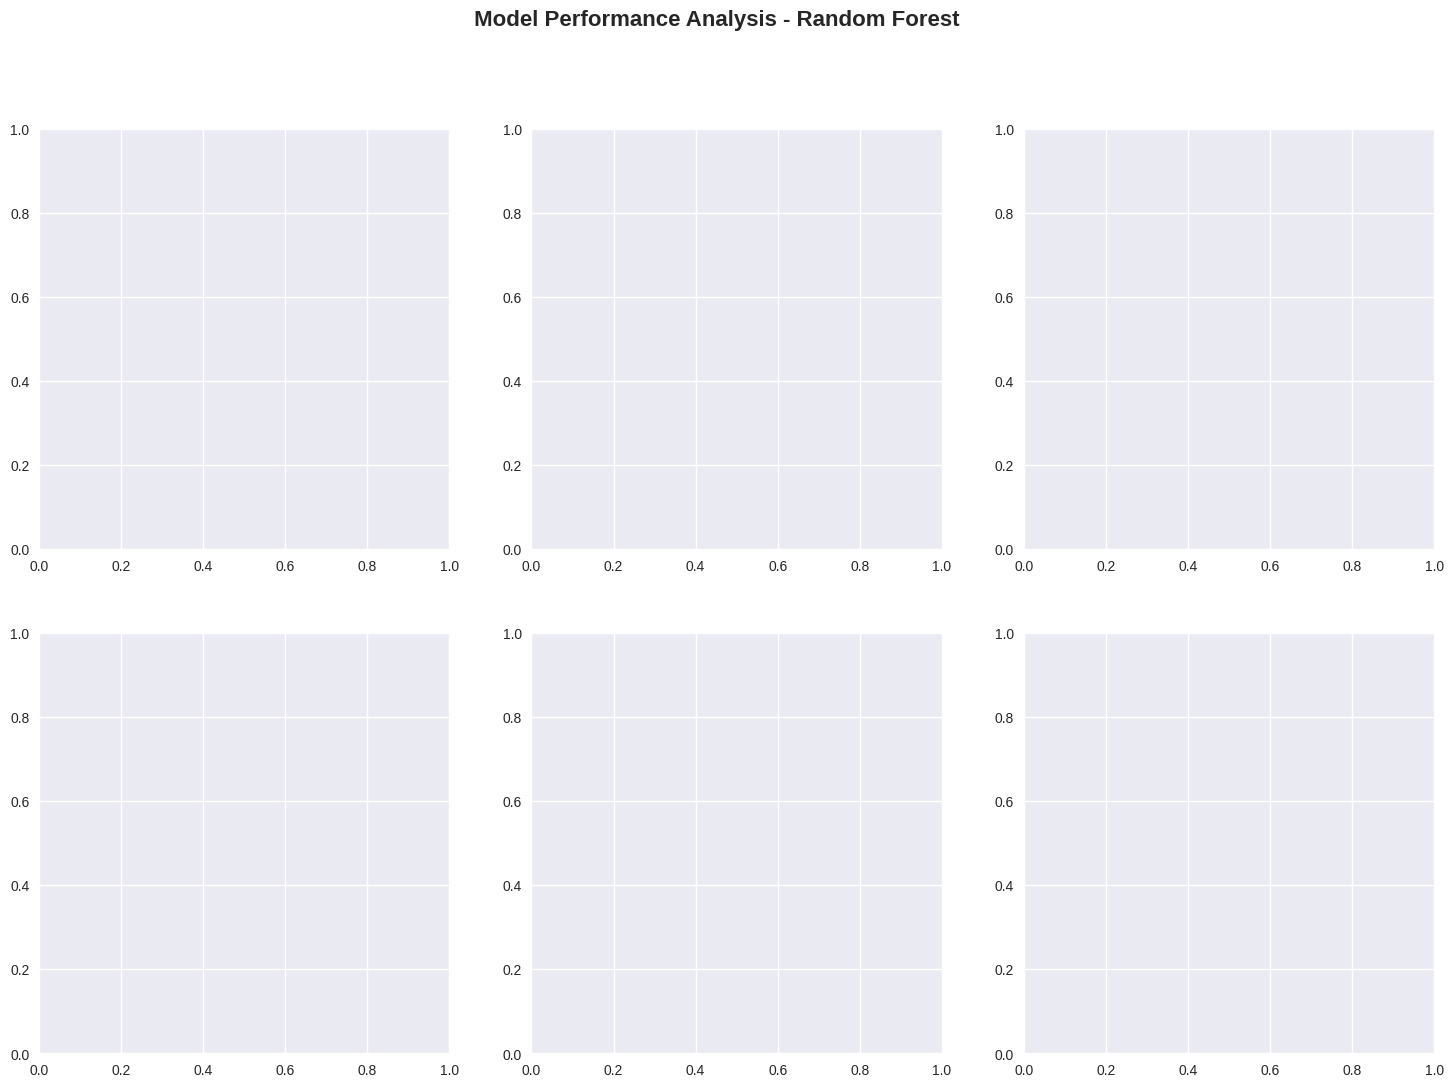

In [255]:
# Create comprehensive performance visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f' Model Performance Analysis - {best_model_name}', fontsize=16, fontweight='bold')

best_predictions = predictions[best_model_name]

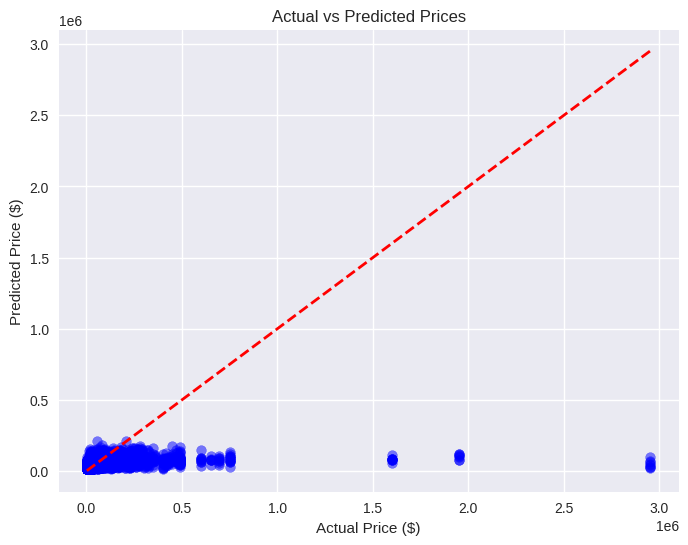

In [259]:
# 1. Actual vs Predicted scatter plot
# Actual vs Predicted scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, best_predictions, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # reference line
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')
plt.show()


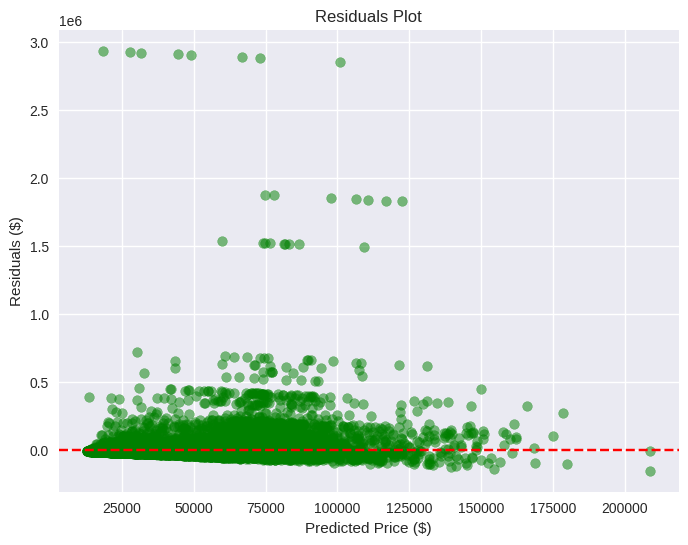

In [260]:
# 2. Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(best_predictions, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot')
plt.show()

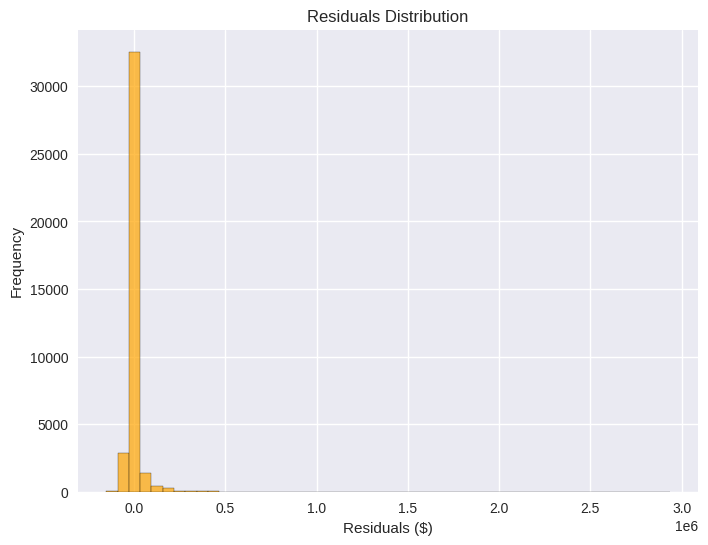

In [261]:
# 3. Residuals histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

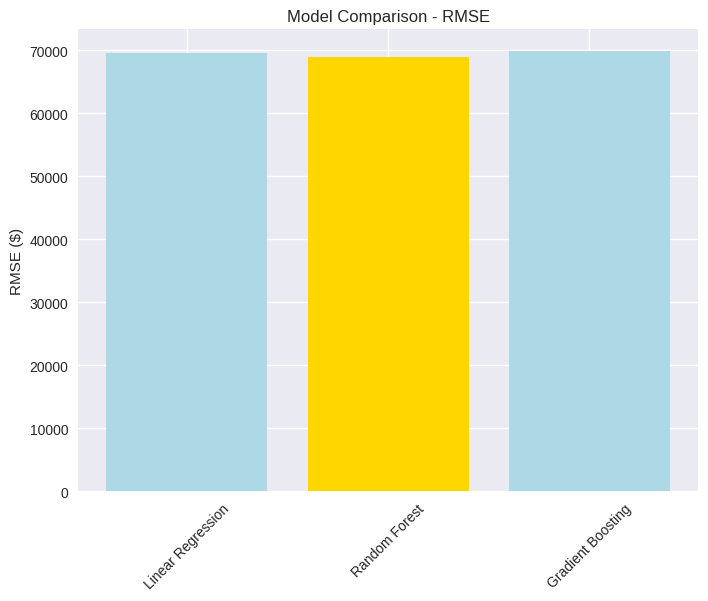

In [262]:
# 4. Model comparison bar chart
model_names = list(rmse_scores.keys())
rmse_values = list(rmse_scores.values())
colors = ['gold' if name == best_model_name else 'lightblue' for name in model_names]

plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values, color=colors)
plt.ylabel('RMSE ($)')
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=45)
plt.show()

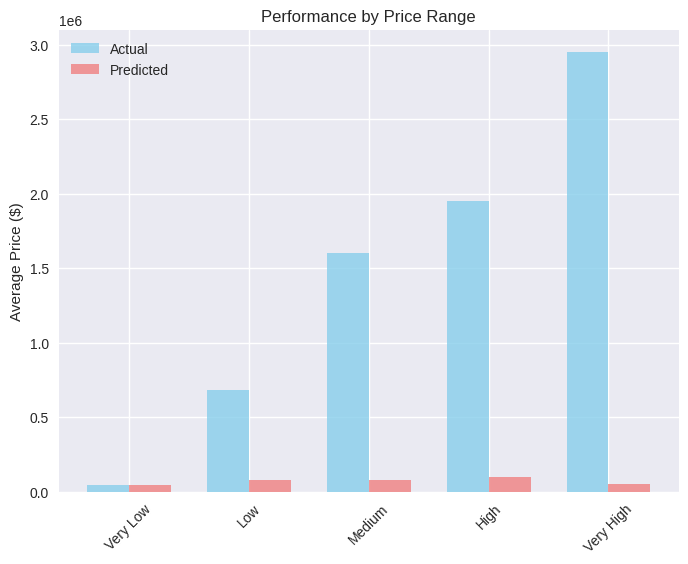

In [264]:
import matplotlib.pyplot as plt
import pandas as pd

# Create price ranges
price_ranges = pd.cut(y_val, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Group by range and calculate mean actual vs predicted
range_performance = pd.DataFrame({
    'Range': price_ranges,
    'Actual': y_val,
    'Predicted': best_predictions
}).groupby('Range').mean()

# Bar chart
x_pos = range(len(range_performance))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar([p - width/2 for p in x_pos], range_performance['Actual'], 
        width, label='Actual', alpha=0.8, color='skyblue')
plt.bar([p + width/2 for p in x_pos], range_performance['Predicted'], 
        width, label='Predicted', alpha=0.8, color='lightcoral')

plt.xticks(x_pos, range_performance.index, rotation=45)
plt.ylabel('Average Price ($)')
plt.title('Performance by Price Range')
plt.legend()
plt.show()

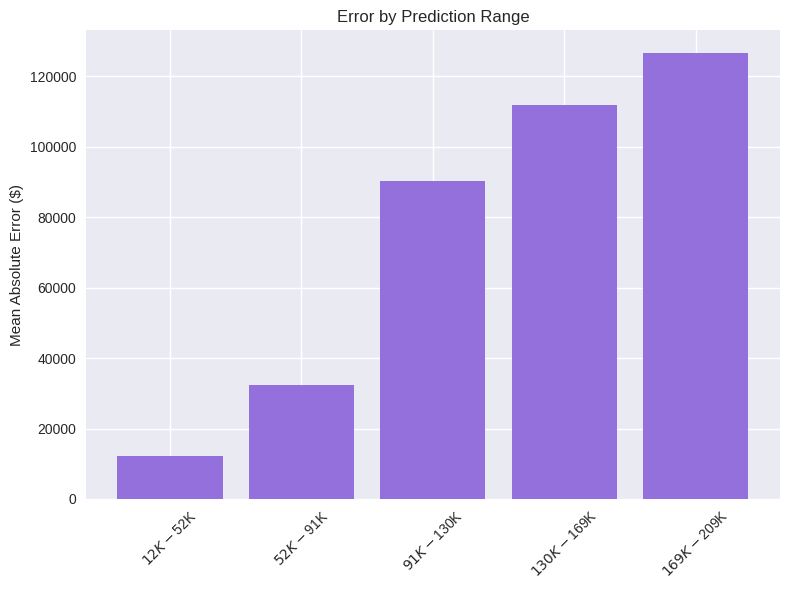

In [266]:
# 6. Error distribution by prediction magnitude
prediction_bins = pd.cut(best_predictions, bins=5)
error_by_bin = pd.DataFrame({
    'Prediction_Bin': prediction_bins,
    'Absolute_Error': np.abs(residuals)
}).groupby('Prediction_Bin')['Absolute_Error'].mean()

plt.figure(figsize=(8,6))
plt.bar(range(len(error_by_bin)), error_by_bin.values, color='mediumpurple')
plt.xticks(
    range(len(error_by_bin)),
    [f'${int(interval.left/1000)}K-${int(interval.right/1000)}K' for interval in error_by_bin.index],
    rotation=45
)
plt.ylabel('Mean Absolute Error ($)')
plt.title('Error by Prediction Range')
plt.tight_layout()
plt.show()

In [267]:
# Performance metrics summary
print(f"\n📈 DETAILED PERFORMANCE METRICS")
print("=" * 40)
print(f" Best Model: {best_model_name}")
print(f" RMSE: ${best_rmse:,.2f}")
print(f" MAE:  ${mae_scores[best_model_name]:,.2f}")
print(f" R²:   {r2_scores[best_model_name]:.4f}")


📈 DETAILED PERFORMANCE METRICS
 Best Model: Random Forest
 RMSE: $68,931.02
 MAE:  $20,613.41
 R²:   0.1456


In [268]:
# Additional statistics
mape = np.mean(np.abs((y_val - best_predictions) / y_val)) * 100
print(f" MAPE: {mape:.2f}%")

 MAPE: 68.34%


In [269]:
# Prediction accuracy ranges
accurate_predictions = np.abs(residuals) / y_val
within_10_percent = (accurate_predictions <= 0.10).sum() / len(accurate_predictions) * 100
within_20_percent = (accurate_predictions <= 0.20).sum() / len(accurate_predictions) * 100

print(f"\n PREDICTION ACCURACY")
print("=" * 30)
print(f"Within 10% of actual: {within_10_percent:.1f}%")
print(f"Within 20% of actual: {within_20_percent:.1f}%")


 PREDICTION ACCURACY
Within 10% of actual: 14.5%
Within 20% of actual: 27.9%


**Cross-Validation Analysis**

In [270]:
print("=" * 60)
print(" CROSS-VALIDATION ANALYSIS")
print("=" * 60)

 CROSS-VALIDATION ANALYSIS


In [271]:
# Perform cross-validation on the best model
print(f" Performing 5-fold cross-validation on {best_model_name}...")

cv_scores = cross_val_score(
    best_model, X, y, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

 Performing 5-fold cross-validation on Random Forest...


In [272]:
cv_rmse_scores = np.sqrt(-cv_scores)
cv_mean = cv_rmse_scores.mean()
cv_std = cv_rmse_scores.std()

In [273]:
print(f"\n CROSS-VALIDATION RESULTS")
print("=" * 35)
print(f" Mean CV RMSE: ${cv_mean:,.2f}")
print(f" Std CV RMSE:  ${cv_std:,.2f}")
print(f" 95% Confidence Interval: ${cv_mean - 2*cv_std:,.2f} to ${cv_mean + 2*cv_std:,.2f}")


 CROSS-VALIDATION RESULTS
 Mean CV RMSE: $73,552.81
 Std CV RMSE:  $3,709.72
 95% Confidence Interval: $66,133.38 to $80,972.25


In [274]:
print(f"\n Individual Fold Results:")
for i, score in enumerate(cv_rmse_scores, 1):
    print(f"   Fold {i}: ${score:,.2f}")


 Individual Fold Results:
   Fold 1: $72,088.31
   Fold 2: $77,125.05
   Fold 3: $75,993.20
   Fold 4: $66,942.50
   Fold 5: $75,615.00


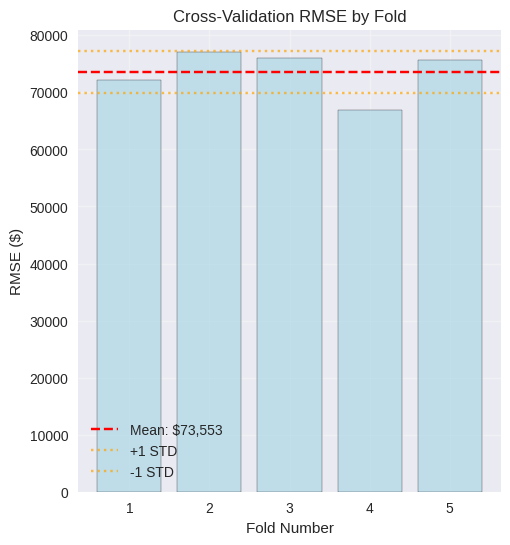

In [275]:
# Visualize CV results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_rmse_scores, alpha=0.7, color='lightblue', edgecolor='black')
plt.axhline(y=cv_mean, color='red', linestyle='--', label=f'Mean: ${cv_mean:,.0f}')
plt.axhline(y=cv_mean + cv_std, color='orange', linestyle=':', alpha=0.7, label=f'+1 STD')
plt.axhline(y=cv_mean - cv_std, color='orange', linestyle=':', alpha=0.7, label=f'-1 STD')
plt.xlabel('Fold Number')
plt.ylabel('RMSE ($)')
plt.title('Cross-Validation RMSE by Fold')
plt.legend()
plt.grid(True, alpha=0.3)

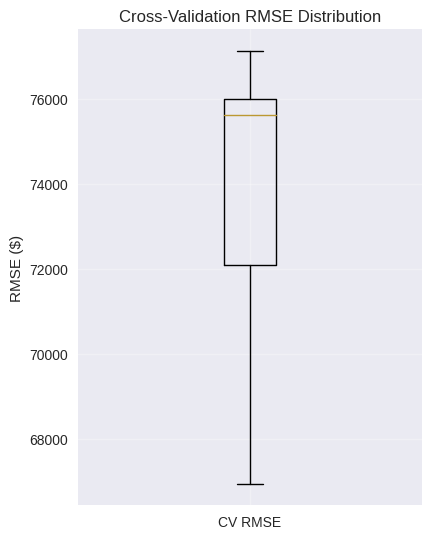

In [276]:
# Box plot of CV scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_rmse_scores, labels=['CV RMSE'])
plt.ylabel('RMSE ($)')
plt.title('Cross-Validation RMSE Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [277]:
# Model stability check
stability_coefficient = cv_std / cv_mean
print(f"\n MODEL STABILITY")
print("=" * 25)
print(f"Coefficient of Variation: {stability_coefficient:.3f}")
if stability_coefficient < 0.1:
    print(" Very stable model")
elif stability_coefficient < 0.2:
    print(" Stable model")
else:
    print(" Model shows some instability")


 MODEL STABILITY
Coefficient of Variation: 0.050
 Very stable model


Final Model Training and Predictions

In [278]:
print("=" * 60)
print(" FINAL MODEL TRAINING AND PREDICTIONS")
print("=" * 60)

 FINAL MODEL TRAINING AND PREDICTIONS


In [ ]:
# Train the best model on the full training dataset
print(f" Training final {best_model_name} on full dataset...")
print(f"   Training samples: {X.shape[0]:,}")
print(f"   Features: {X.shape[1]:,}")

In [279]:
final_model = best_model
final_model.fit(X, y)

print(" Final model training completed!")

 Final model training completed!


In [280]:
# Make predictions on test set
print(f"\n Generating predictions for test set...")
print(f"   Test samples: {X_test.shape[0]:,}")

final_predictions = final_model.predict(X_test)


 Generating predictions for test set...
   Test samples: 125,690


In [282]:
# Post-processing predictions
print(f"\n Post-processing predictions...")


 Post-processing predictions...


In [283]:
# Ensure no negative predictions (cars can't have negative prices)
original_negative = (final_predictions < 0).sum()
if original_negative > 0:
    print(f"    Found {original_negative} negative predictions, setting to minimum $2,000")
    final_predictions = np.maximum(final_predictions, 2000)

In [284]:
# Round predictions to 2 decimal places (cents)
final_predictions = np.round(final_predictions, 2)

print(" Predictions post-processing completed!")

 Predictions post-processing completed!


In [286]:
import numpy as np

# Prediction statistics
print(f"\n FINAL PREDICTIONS STATISTICS")
print("=" * 40)
print(f"Number of predictions: {len(final_predictions):,}")
print(f"Minimum prediction: ${np.min(final_predictions):,.2f}")
print(f"Maximum prediction: ${np.max(final_predictions):,.2f}")
print(f"Mean prediction: ${np.mean(final_predictions):,.2f}")
print(f"Median prediction: ${np.median(final_predictions):,.2f}")
print(f"Standard deviation: ${np.std(final_predictions):,.2f}")
print(f"25th percentile: ${np.percentile(final_predictions, 25):,.2f}")
print(f"75th percentile: ${np.percentile(final_predictions, 75):,.2f}")


 FINAL PREDICTIONS STATISTICS
Number of predictions: 125,690
Minimum prediction: $13,022.86
Maximum prediction: $190,357.87
Mean prediction: $43,351.16
Median prediction: $39,048.86
Standard deviation: $21,216.07
25th percentile: $25,131.99
75th percentile: $58,941.59


In [287]:
# Compare with training data distribution
print(f"\n COMPARISON WITH TRAINING DATA")
print("=" * 40)
print(f"Training mean: ${y.mean():,.2f}")
print(f"Training median: ${y.median():,.2f}")
print(f"Training std: ${y.std():,.2f}")


 COMPARISON WITH TRAINING DATA
Training mean: $43,878.02
Training median: $30,825.00
Training std: $78,819.52


In [289]:
# Distribution comparison
difference_mean = abs(np.mean(final_predictions) - np.mean(y))
difference_median = abs(np.median(final_predictions) - np.median(y))
difference_std = abs(np.std(final_predictions) - np.std(y))

print(f"\n Distribution Differences:")
print(f"Mean difference: ${difference_mean:,.2f}")
print(f"Median difference: ${difference_median:,.2f}")
print(f"Std difference: ${difference_std:,.2f}")


 Distribution Differences:
Mean difference: $526.85
Median difference: $8,223.86
Std difference: $57,603.24


In [290]:
# Visualization of predictions
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

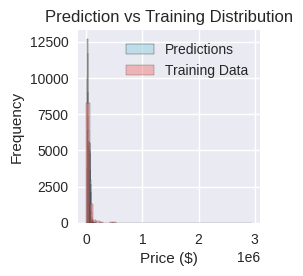

In [291]:
# Prediction distribution
plt.subplot(2, 3, 1)
plt.hist(final_predictions, bins=50, alpha=0.7, color='lightblue', edgecolor='black', label='Predictions')
plt.hist(y.sample(10000, random_state=42), bins=50, alpha=0.5, color='lightcoral', edgecolor='black', label='Training Data')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Prediction vs Training Distribution')
plt.legend()

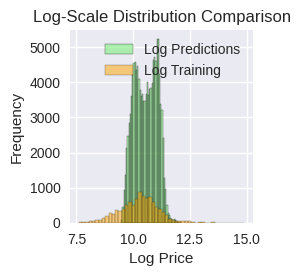

In [292]:
# Log scale distribution
plt.subplot(2, 3, 2)
plt.hist(np.log(final_predictions), bins=50, alpha=0.7, color='lightgreen', edgecolor='black', label='Log Predictions')
plt.hist(np.log(y.sample(10000, random_state=42)), bins=50, alpha=0.5, color='orange', edgecolor='black', label='Log Training')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log-Scale Distribution Comparison')
plt.legend()

Text(0.5, 1.0, 'Price Distribution Box Plot')

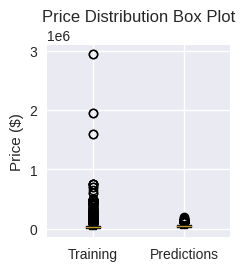

In [293]:
# Box plot comparison
plt.subplot(2, 3, 3)
data_to_plot = [y.sample(10000, random_state=42), final_predictions[:10000]]
plt.boxplot(data_to_plot, labels=['Training', 'Predictions'])
plt.ylabel('Price ($)')
plt.title('Price Distribution Box Plot')

([<matplotlib.axis.XTick at 0x79dee3b5a410>,
 [Text(0, 0, '$12K-$30K'),
  Text(1, 0, '$30K-$48K'),
  Text(2, 0, '$48K-$66K'),
  Text(3, 0, '$66K-$83K'),
  Text(4, 0, '$83K-$101K'),
  Text(5, 0, '$101K-$119K'),
  Text(6, 0, '$119K-$137K'),
  Text(7, 0, '$137K-$154K'),
  Text(8, 0, '$154K-$172K'),
  Text(9, 0, '$172K-$190K')])

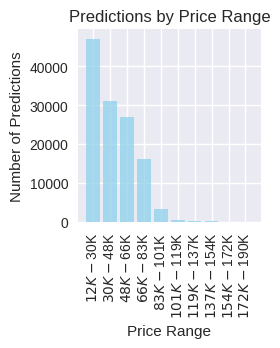

In [294]:
# Prediction by price range
plt.subplot(2, 3, 4)
pred_ranges = pd.cut(final_predictions, bins=10)
range_counts = pred_ranges.value_counts().sort_index()
plt.bar(range(len(range_counts)), range_counts.values, color='skyblue', alpha=0.7)
plt.xlabel('Price Range')
plt.ylabel('Number of Predictions')
plt.title('Predictions by Price Range')
plt.xticks(range(len(range_counts)), [f'${int(interval.left/1000)}K-${int(interval.right/1000)}K' 
                                     for interval in range_counts.index], rotation=90)

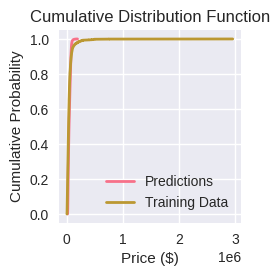

In [295]:
# Cumulative distribution
plt.subplot(2, 3, 5)
sorted_predictions = np.sort(final_predictions)
sorted_training = np.sort(y.sample(10000, random_state=42))
plt.plot(sorted_predictions, np.linspace(0, 1, len(sorted_predictions)), label='Predictions', linewidth=2)
plt.plot(sorted_training, np.linspace(0, 1, len(sorted_training)), label='Training Data', linewidth=2)
plt.xlabel('Price ($)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.legend()

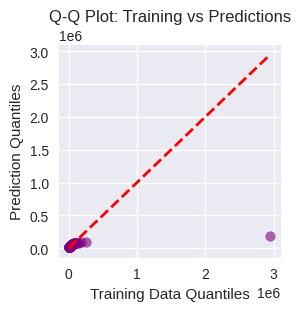

In [296]:
# Q-Q plot style comparison
plt.subplot(2, 3, 6)
training_quantiles = np.percentile(y, np.linspace(0, 100, 101))
prediction_quantiles = np.percentile(final_predictions, np.linspace(0, 100, 101))
plt.scatter(training_quantiles, prediction_quantiles, alpha=0.6, color='purple')
plt.plot([training_quantiles.min(), training_quantiles.max()], 
         [training_quantiles.min(), training_quantiles.max()], 'r--', linewidth=2)
plt.xlabel('Training Data Quantiles')
plt.ylabel('Prediction Quantiles')
plt.title('Q-Q Plot: Training vs Predictions')

plt.tight_layout()
plt.show()

In [297]:
print("\n Prediction analysis completed!")


 Prediction analysis completed!


**Create Submission File**

In [298]:
print("=" * 60)
print(" CREATING SUBMISSION FILE")
print("=" * 60)

 CREATING SUBMISSION FILE


In [299]:
# Create submission dataframe
submission = pd.DataFrame({
    'id': test_processed['id'],
    'price': final_predictions
})

print(f" Submission file details:")
print(f"   Shape: {submission.shape}")
print(f"   Columns: {list(submission.columns)}")

 Submission file details:
   Shape: (125690, 2)
   Columns: ['id', 'price']


In [300]:
# Verify submission format matches competition requirements
print(f"\n SUBMISSION FORMAT VALIDATION")
print("=" * 40)


 SUBMISSION FORMAT VALIDATION


In [301]:
# Check ID range
print(f"ID range: {submission['id'].min()} to {submission['id'].max()}")
print(f"Expected range: {sample_submission['id'].min()} to {sample_submission['id'].max()}")

ID range: 188533 to 314222
Expected range: 188533 to 314222


In [302]:
# Check for missing values
missing_ids = submission['id'].isnull().sum()
missing_prices = submission['price'].isnull().sum()
print(f"Missing IDs: {missing_ids}")
print(f"Missing prices: {missing_prices}")

Missing IDs: 0
Missing prices: 0


In [303]:
# Check for duplicates
duplicate_ids = submission['id'].duplicated().sum()
print(f"Duplicate IDs: {duplicate_ids}")

Duplicate IDs: 0


In [304]:
# Verify all test IDs are present
missing_test_ids = set(sample_submission['id']) - set(submission['id'])
extra_ids = set(submission['id']) - set(sample_submission['id'])

print(f"Missing test IDs: {len(missing_test_ids)}")
print(f"Extra IDs: {len(extra_ids)}")

if len(missing_test_ids) == 0 and len(extra_ids) == 0:
    print(" All test IDs are correctly included!")
else:
    print(" ID mismatch detected!")

Missing test IDs: 0
Extra IDs: 0
 All test IDs are correctly included!


In [305]:
# Display sample predictions
print(f"\n SAMPLE SUBMISSION ENTRIES")
print("=" * 35)
print(submission.head(10))


 SAMPLE SUBMISSION ENTRIES
       id     price
0  188533  22651.83
1  188534  67088.92
2  188535  54972.06
3  188536  34124.40
4  188537  32954.06
5  188538  22535.43
6  188539  19902.73
7  188540  47421.25
8  188541  70309.79
9  188542  35362.69


In [306]:
print(f"\n SUBMISSION STATISTICS")
print("=" * 30)
print(f"Total predictions: {len(submission):,}")
print(f"Price range: ${submission['price'].min():,.2f} - ${submission['price'].max():,.2f}")
print(f"Average price: ${submission['price'].mean():,.2f}")
print(f"Median price: ${submission['price'].median():,.2f}")


 SUBMISSION STATISTICS
Total predictions: 125,690
Price range: $13,022.86 - $190,357.87
Average price: $43,351.16
Median price: $39,048.86


In [307]:
# Save submission file
submission_filename = 'submission.csv'
submission.to_csv(submission_filename, index=False)

In [308]:
print(f"\n SUBMISSION SAVED")
print("=" * 25)
print(f"Filename: {submission_filename}")
print(f"File size: {len(submission):,} rows")


 SUBMISSION SAVED
Filename: submission.csv
File size: 125,690 rows


In [309]:
# Verify saved file
saved_submission = pd.read_csv(submission_filename)
print(f"Verification - loaded shape: {saved_submission.shape}")
print(f"Verification - columns match: {list(saved_submission.columns) == ['id', 'price']}")

Verification - loaded shape: (125690, 2)
Verification - columns match: True


In [310]:
print(f"\n FINAL SUBMISSION SUMMARY")
print("=" * 35)
print(f" Best Model Used: {best_model_name}")
print(f" Validation RMSE: ${best_rmse:,.2f}")
print(f" Cross-validation RMSE: ${cv_mean:,.2f} (±${cv_std*2:.0f})")
print(f" Submission File: {submission_filename}")
print(f" Total Predictions: {len(submission):,}")


 FINAL SUBMISSION SUMMARY
 Best Model Used: Random Forest
 Validation RMSE: $68,931.02
 Cross-validation RMSE: $73,552.81 (±$7419)
 Submission File: submission.csv
 Total Predictions: 125,690
